## Titanic Project

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("ttrain.csv")
df2=pd.read_csv("ttest.csv")

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

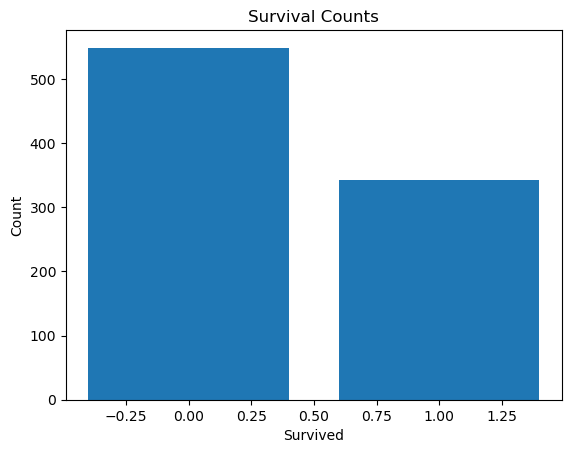

In [13]:
survived_counts = df['Survived'].value_counts()
plt.bar(survived_counts.index, survived_counts.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Counts')
plt.show()

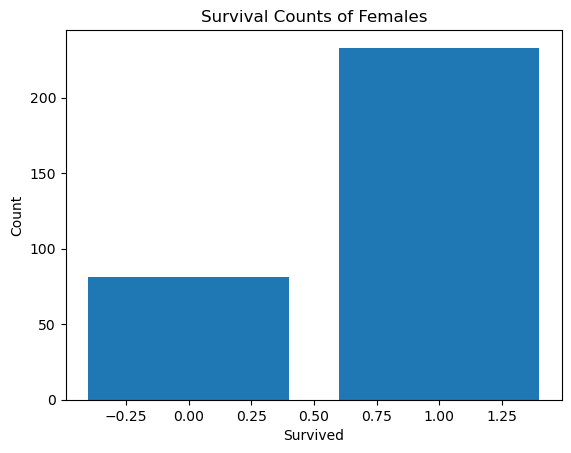

In [14]:
female_survived = df[df['Sex'] == 'female']['Survived'].value_counts()
plt.bar(female_survived.index, female_survived.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Counts of Females')
plt.show()

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
mean_value_age=df["Age"].mean()
mean_value_age


29.69911764705882

In [18]:
df["Age"].fillna(mean_value_age, inplace=True)

In [19]:
mean_value_age_test=df2["Age"].mean()
print("mean_value_age_test",mean_value_age_test)
mean_value_fare_test=df2["Fare"].mean()
print("mean_value_fare_test",mean_value_fare_test)

mean_value_age_test 30.272590361445783
mean_value_fare_test 35.627188489208635


In [20]:
df2["Age"].fillna(mean_value_age_test, inplace=True)
df2["Fare"].fillna(mean_value_fare_test, inplace=True)

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [23]:
df = df.dropna(subset=["Embarked"])

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age_Standart'] = scaler.fit_transform(df[['Age']])
df['SibSp_Standart'] = scaler.fit_transform(df[['SibSp']])
df['Parch_Standart'] = scaler.fit_transform(df[['Parch']])
df['Fare_Standart'] = scaler.fit_transform(df[['Fare']])
print(df)

df2['Age_Standart'] = scaler.fit_transform(df2[['Age']])
df2['SibSp_Standart'] = scaler.fit_transform(df2[['SibSp']])
df2['Parch_Standart'] = scaler.fit_transform(df2[['Parch']])
df2['Fare_Standart'] = scaler.fit_transform(df2[['Fare']])
print(df2)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Standart,SibSp_Standart,Parch_Standart,Fare_Standart
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.590495,0.431350,-0.474326,-0.500240
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.643971,0.431350,-0.474326,0.788947
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.281878,-0.475199,-0.474326,-0.486650
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.412509,0.431350,-0.474326,0.422861
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.412509,-0.475199,-0.474326,-0.484133


In [27]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Standart,SibSp_Standart,Parch_Standart,Fare_Standart
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.334993,-0.499470,-0.400248,-0.498407
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.325530,0.616992,-0.400248,-0.513274
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2.514175,-0.499470,-0.400248,-0.465088
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-0.259330,-0.499470,-0.400248,-0.483466
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-0.655545,0.616992,0.619896,-0.418471


In [28]:
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex', drop_first=True)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Standart,SibSp_Standart,Parch_Standart,Fare_Standart,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,-0.590495,0.431350,-0.474326,-0.500240,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0.643971,0.431350,-0.474326,0.788947,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.281878,-0.475199,-0.474326,-0.486650,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0.412509,0.431350,-0.474326,0.422861,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0.412509,-0.475199,-0.474326,-0.484133,1


In [30]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_Standart,SibSp_Standart,Parch_Standart,Fare_Standart,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,-0.590495,0.431350,-0.474326,-0.500240,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.643971,0.431350,-0.474326,0.788947,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,-0.281878,-0.475199,-0.474326,-0.486650,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.412509,0.431350,-0.474326,0.422861,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.412509,-0.475199,-0.474326,-0.484133,1,0,1


In [32]:
df2 = pd.get_dummies(df2, columns=['Embarked'], prefix='Embarked', drop_first=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_Standart,SibSp_Standart,Parch_Standart,Fare_Standart,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,-0.590495,0.431350,-0.474326,-0.500240,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.643971,0.431350,-0.474326,0.788947,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,-0.281878,-0.475199,-0.474326,-0.486650,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.412509,0.431350,-0.474326,0.422861,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.412509,-0.475199,-0.474326,-0.484133,1,0,1


In [34]:
df2 = pd.get_dummies(df2, columns=['Sex'], prefix='Sex', drop_first=True)

In [35]:
df2.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_Standart,SibSp_Standart,Parch_Standart,Fare_Standart,Embarked_Q,Embarked_S,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0.334993,-0.499470,-0.400248,-0.498407,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1.325530,0.616992,-0.400248,-0.513274,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,2.514175,-0.499470,-0.400248,-0.465088,1,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,-0.259330,-0.499470,-0.400248,-0.483466,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,-0.655545,0.616992,0.619896,-0.418471,0,1,0


In [36]:
x=df[["Pclass","Sex_male", "Age_Standart", "SibSp_Standart", "Parch_Standart","Fare_Standart", "Embarked_Q", "Embarked_S"]]
y=df[["Survived"]]

In [37]:
test_x=df2[["Pclass","Sex_male", "Age_Standart", "SibSp_Standart", "Parch_Standart","Fare_Standart", "Embarked_Q", "Embarked_S"]]

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_Standart,SibSp_Standart,Parch_Standart,Fare_Standart,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,-0.590495,0.431350,-0.474326,-0.500240,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.643971,0.431350,-0.474326,0.788947,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,-0.281878,-0.475199,-0.474326,-0.486650,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.412509,0.431350,-0.474326,0.422861,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.412509,-0.475199,-0.474326,-0.484133,1,0,1


In [39]:
df2.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_Standart,SibSp_Standart,Parch_Standart,Fare_Standart,Embarked_Q,Embarked_S,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0.334993,-0.499470,-0.400248,-0.498407,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1.325530,0.616992,-0.400248,-0.513274,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,2.514175,-0.499470,-0.400248,-0.465088,1,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,-0.259330,-0.499470,-0.400248,-0.483466,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,-0.655545,0.616992,0.619896,-0.418471,0,1,0


In [40]:
lr = LinearRegression()
regmodel = lr.fit(x,y)

In [41]:
y_pretest = regmodel.predict(test_x)
print(y_pretest)

[[ 0.12845508]
 [ 0.44143762]
 [ 0.13400118]
 [ 0.11027332]
 [ 0.58139479]
 [ 0.18927797]
 [ 0.65945176]
 [ 0.229545  ]
 [ 0.73354522]
 [ 0.04895814]
 [ 0.09022505]
 [ 0.34323186]
 [ 0.95005453]
 [ 0.01737808]
 [ 0.7990727 ]
 [ 0.82344294]
 [ 0.29846979]
 [ 0.21159566]
 [ 0.56299848]
 [ 0.56975627]
 [ 0.31163187]
 [ 0.205011  ]
 [ 0.94384066]
 [ 0.55617526]
 [ 0.87059023]
 [-0.07859331]
 [ 1.05401229]
 [ 0.20249633]
 [ 0.37471349]
 [ 0.05736943]
 [ 0.09623891]
 [ 0.20453066]
 [ 0.50373514]
 [ 0.52101526]
 [ 0.46286545]
 [ 0.22676228]
 [ 0.59401431]
 [ 0.65042046]
 [ 0.12261988]
 [ 0.10265081]
 [ 0.09093664]
 [ 0.43877837]
 [ 0.02513854]
 [ 0.76882545]
 [ 0.80900102]
 [ 0.12221719]
 [ 0.41553664]
 [ 0.15407922]
 [ 0.84020551]
 [ 0.53517733]
 [ 0.43454546]
 [ 0.3490867 ]
 [ 0.71732198]
 [ 0.83815973]
 [ 0.32937403]
 [ 0.06612757]
 [ 0.06154755]
 [ 0.12214688]
 [ 0.04148653]
 [ 1.03337143]
 [ 0.17073947]
 [ 0.25307102]
 [ 0.16463598]
 [ 0.708006  ]
 [ 0.54137205]
 [ 0.76921725]
 [ 0.73231

In [42]:
#r2_score(y_test,y_pretest)

In [43]:
#(mean_squared_error(y,y_pretest))**0.5 

In [44]:
from sklearn.linear_model import Ridge,Lasso


In [45]:
R = Ridge()
R.fit(x,y)
y_pred_ridge = R.predict(test_x)
print(y_pred_ridge)

[[ 0.12967274]
 [ 0.43975526]
 [ 0.13515053]
 [ 0.11110145]
 [ 0.57986642]
 [ 0.19003371]
 [ 0.65797948]
 [ 0.23055144]
 [ 0.7314131 ]
 [ 0.04992133]
 [ 0.09106819]
 [ 0.34378493]
 [ 0.9481458 ]
 [ 0.01831177]
 [ 0.79719455]
 [ 0.82125888]
 [ 0.29947649]
 [ 0.21214375]
 [ 0.56120506]
 [ 0.56778047]
 [ 0.31221587]
 [ 0.20597826]
 [ 0.94166901]
 [ 0.55679904]
 [ 0.87032858]
 [-0.0775569 ]
 [ 1.05198207]
 [ 0.20305311]
 [ 0.37526072]
 [ 0.0581357 ]
 [ 0.09709733]
 [ 0.2053119 ]
 [ 0.50258462]
 [ 0.51986372]
 [ 0.46329622]
 [ 0.22729591]
 [ 0.59219538]
 [ 0.64855099]
 [ 0.12344074]
 [ 0.10374369]
 [ 0.09189235]
 [ 0.4392432 ]
 [ 0.02604355]
 [ 0.7667933 ]
 [ 0.80706699]
 [ 0.12302996]
 [ 0.41586502]
 [ 0.15527199]
 [ 0.83819729]
 [ 0.53397505]
 [ 0.43519096]
 [ 0.34947257]
 [ 0.71564509]
 [ 0.83784204]
 [ 0.32978165]
 [ 0.0677648 ]
 [ 0.06241806]
 [ 0.12295823]
 [ 0.04241694]
 [ 1.03218046]
 [ 0.17150576]
 [ 0.25371587]
 [ 0.16540731]
 [ 0.70648788]
 [ 0.54334413]
 [ 0.76722779]
 [ 0.73076

In [46]:
L = Lasso()
L.fit(x,y)
y_pred_lasso = L.predict(test_x)
y_pred_lasso

array([0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245

In [47]:
from sklearn.linear_model import ElasticNet

In [48]:
E = ElasticNet(l1_ratio = .8)

In [49]:
E.fit(x,y)
y_pred_elastic = E.predict(test_x)
y_pred_elastic

array([0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245219,
       0.38245219, 0.38245219, 0.38245219, 0.38245219, 0.38245

In [50]:
# ExtraTreeRegressor
ETR = ExtraTreeRegressor()
ETR.fit(x,y)
y_pred_etr = ETR.predict(test_x) 
y_pred_etr

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.     

In [51]:
#GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x,y)

GradientBoostingRegressor()

In [52]:
y_pred_gbr = GBR.predict(test_x)
y_pred_gbr

array([-0.01546168,  0.21847554,  0.10514064,  0.14183683,  0.48503643,
        0.48466306,  1.204203  ,  0.13299144,  0.35845305,  0.0822786 ,
        0.07010235,  0.15718442,  0.93785069,  0.19293203,  0.92544167,
        0.92695202,  0.13315177,  0.07556687,  0.81699521,  0.20388453,
        0.42231401,  0.64307778,  0.88509982,  0.52886376,  0.95389269,
        0.08019345,  1.04337743,  0.07556687,  0.33994629,  0.19209466,
        0.07803298,  0.12262081,  0.52363768,  0.45080592,  0.36645646,
        0.08239753,  0.48913248,  0.447467  ,  0.08969957,  0.16376873,
        0.06906327,  0.25523785,  0.0420766 ,  0.86022882,  0.84377401,
        0.10367254,  0.29227622,  0.11808614,  0.9285186 ,  0.398242  ,
        0.45187728,  0.21346534,  0.81579551,  0.77842642,  0.16388601,
        0.08094925,  0.06313698,  0.61908513,  0.04199234,  1.03142506,
        0.12633975,  0.21734827,  0.11050321,  0.78001912,  0.59066631,
        0.85688242,  0.78684978,  0.2500103 ,  0.13763437,  0.87

In [53]:
#K- Neighbors  #konuma göre komsularin ev fiyatlarına bakarak fiyat tahmin ediyor 
from sklearn.neighbors import KNeighborsRegressor       
est = KNeighborsRegressor(n_neighbors = 10,weights = 'uniform')
model = est.fit(x,y)

In [54]:
y_pred_knb = model.predict(test_x)
y_pred_knb

array([[0.1],
       [0.2],
       [0.1],
       [0.3],
       [0.3],
       [0.1],
       [0.8],
       [0.3],
       [0.7],
       [0.1],
       [0.1],
       [0.4],
       [1. ],
       [0.1],
       [0.8],
       [0.8],
       [0.3],
       [0.4],
       [0.4],
       [0.2],
       [0.8],
       [0.6],
       [0.5],
       [0.5],
       [0.7],
       [0. ],
       [1. ],
       [0.4],
       [0.5],
       [0.2],
       [0. ],
       [0.1],
       [0.4],
       [0.3],
       [0.4],
       [0.4],
       [0.4],
       [0.6],
       [0.1],
       [0.5],
       [0.2],
       [0.4],
       [0.1],
       [1. ],
       [0.9],
       [0.1],
       [0.6],
       [0.1],
       [0.7],
       [0.6],
       [0.5],
       [0.1],
       [0.4],
       [0.8],
       [0.2],
       [0. ],
       [0. ],
       [0.1],
       [0.1],
       [0.7],
       [0.1],
       [0.2],
       [0.1],
       [0.7],
       [0.6],
       [1. ],
       [0.7],
       [0.3],
       [0.4],
       [0.7],
       [0.7],
      

In [55]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x,y)
pred=model.predict(test_x)
pred

array([-1.18381783e-01, -1.73854366e-01,  6.70821488e-01,  9.75883186e-01,
        5.74000955e-01,  6.63942814e-01,  9.62296605e-01,  4.45160232e-02,
        2.02076033e-01,  1.84721008e-01,  1.53654693e-02, -3.13416502e-04,
        9.92584646e-01,  2.22772211e-01,  8.77752304e-01,  9.49504673e-01,
       -9.02769640e-02,  2.87155181e-01,  7.42093861e-01, -2.46157534e-02,
        2.35477880e-01,  6.53128207e-01,  6.27711535e-01,  5.35137415e-01,
        9.34014678e-01, -7.31131360e-02,  1.11957157e+00,  2.69115478e-01,
        8.59720632e-02,  2.59530276e-01, -3.60878110e-02, -9.62081030e-02,
        5.52632689e-01,  3.83314669e-01,  9.68774557e-02,  7.19705001e-02,
        1.30033419e-01,  7.54455149e-01, -9.30756107e-02, -1.49046123e-01,
        2.11944133e-01,  3.62525396e-02,  1.57420840e-02,  1.14288926e+00,
        7.95024931e-01, -3.36584039e-02,  4.10039216e-01, -2.84677986e-02,
        9.83807564e-01,  1.89395174e-01,  5.58234155e-01,  6.08438551e-01,
        6.47731960e-01,  